<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [10]:
path_1 = '/datasets/insurance.csv'
path_2 = "C:\\DS\\YP\\S13\\insurance.csv"


def generate_data (path_1, path_2):
    if os.path.exists(path_1):
        df = pd.read_csv(path_1)
    elif os.path.exists(path_2):
        df = pd.read_csv(path_2)
    else:
        print('Something is wrong')
    return df

In [11]:
df = generate_data(path_1, path_2)

Проверим загрузку датафрейма, выведем на экран

In [4]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Заменим название колонок на английский аналог и со строчной буквы

In [5]:
df.set_axis(['gender', 'age', 'salary', 'family_members', 'insurance_payments'], 
            axis='columns' ,inplace=True)

Выведем информацию о датафрейме

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   salary              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_payments  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Проверим на пропуски

In [7]:
df.isnull().sum()

gender                0
age                   0
salary                0
family_members        0
insurance_payments    0
dtype: int64

Выведем статистику о данных

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
age,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
salary,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
family_members,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
insurance_payments,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


Проверим на дубликаты

In [9]:
df.duplicated().sum()

153

Удалим дубликаты

In [10]:
df.drop_duplicates(inplace=True)
# проверка
df.duplicated().sum()

0

Возраст и зарплата имеют тип данных float, хотя им больше подходит int.
Замени возраст на uint8, а зарплату на uint32. Отсальные колонки тоже заменим на uint8 для экономии памяти

In [11]:
df['gender'] = df['gender'].astype(np.uint8)
df['age'] = df['age'].astype(np.uint8)
df['salary'] = df['salary'].astype(np.uint32)
df['family_members'] = df['family_members'].astype(np.uint8)
df['insurance_payments'] = df['insurance_payments'].astype(np.uint8)

#проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              4847 non-null   uint8 
 1   age                 4847 non-null   uint8 
 2   salary              4847 non-null   uint32
 3   family_members      4847 non-null   uint8 
 4   insurance_payments  4847 non-null   uint8 
dtypes: uint32(1), uint8(4)
memory usage: 75.7 KB


Объем данныз уменьшился с 195.4 КБ до 75.7 КБ, что в два с половиной раза меньше. Это позволит снизить объем данных и ускорить вычисления, если данных будет будет значительно больше.

Проверим распределение данных.

Напишем функции для отрисовки диограмм размаха и гистрограмм

In [12]:
# фнукция для отрисовки ящика с усами
def draw_boxplot(df, column, title,
                 figsize=(15,3), color='green',
                 xlabel='', xlim=None):
    plt.figure(figsize=figsize)
    
    ax = sns.boxplot(
        x=df[column],
        color=color
    )
    
    if (xlim != None):
        plt.xlim(xlim)
    
    ax.set(
        xlabel=xlabel,
        title=title
    )

In [13]:
# функция для отрисовки гистрограмм
def draw_histogram(df, column, title,  
                   figsize=(14,5), color='green',
                   xlabel='', ylabel='', bins=None, xticks=0,
                   xlim=None, ylim=None):
    plt.figure(figsize=figsize)
    
    ax = sns.distplot(
        df[column],
        color=color,
        kde=False,
        bins=bins
    )
    
    if (xlim != None):
        plt.xlim(xlim)
    if (ylim != None):
        plt.ylim(ylim)
    
    ax.set(
        xlabel=xlabel,
        ylabel=ylabel,
        title=title
    )
    
    if xticks != 0:
        ax.set(xticks=xticks)

**Пол клиентов**

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


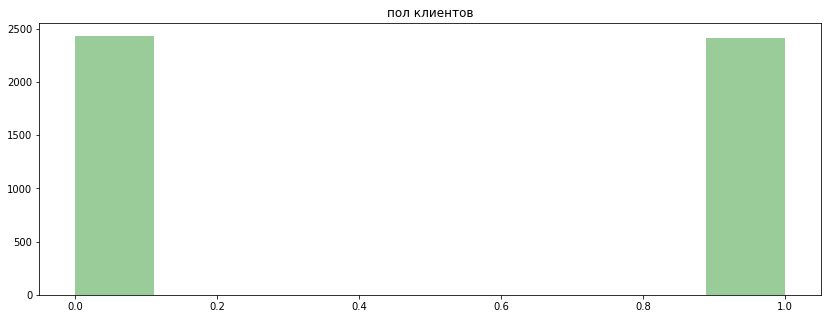

In [14]:
draw_histogram(df, 'gender', 'пол клиентов')

Данные выглядят адекватно. Количество клиентов по генденрному составу распределяется примерно поровну

**Возраст клиентов**

Никаких выбросов не обнаружено, данные по полу распределены равномерно

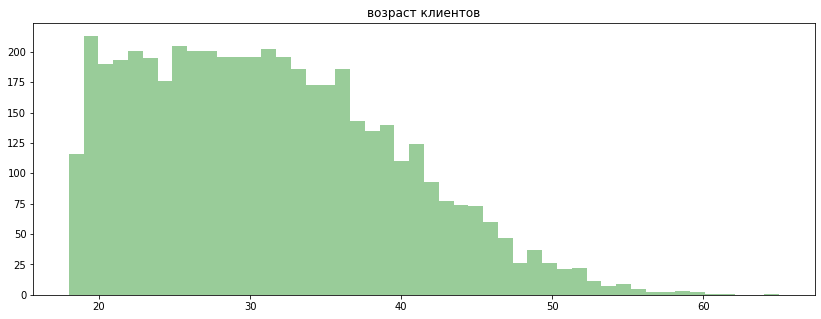

In [15]:
draw_histogram(df, 'age', 'возраст клиентов', bins = 48)

Распределение выглядит адекватным. Большинство клиентов возрасто до 40 лет

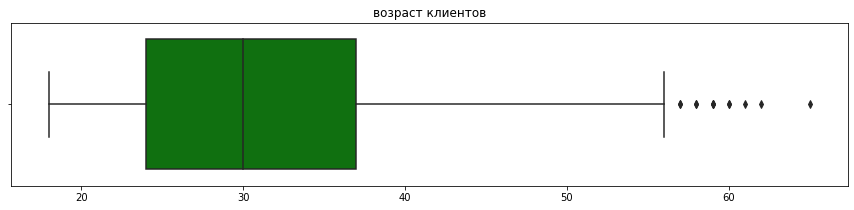

In [16]:
draw_boxplot(df, 'age', 'возраст клиентов')

Клиенты возрастом старше 56 лет на графике показаны как выборсы. Удалять их не будем. Так как нам важны данные о клиентах всех возрастов.

**Зарплата клиентов**

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


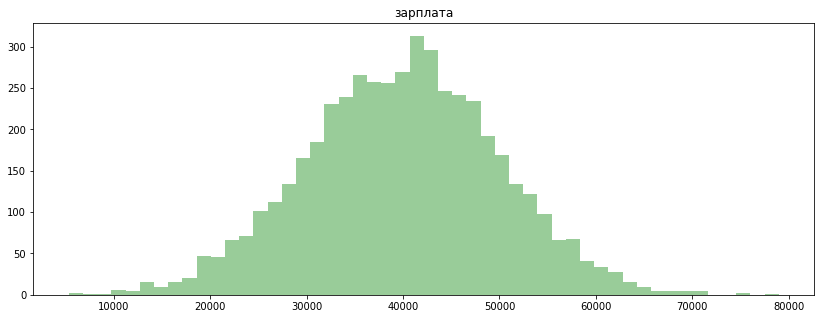

In [17]:
draw_histogram(df, 'salary', 'зарплата', bins=50)

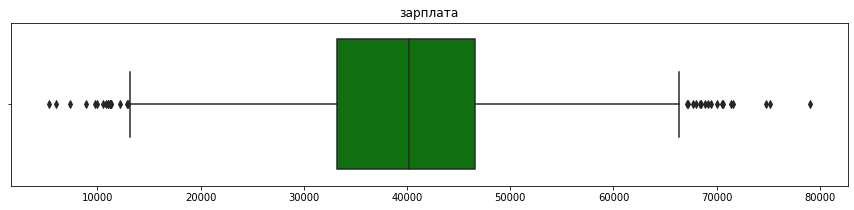

In [18]:
draw_boxplot(df, 'salary', 'зарплата')

Данные по зарплате, выоглядят адекватно. Изабвляться от выборосов не будем, на понадобятся все данные.

**Члены семьи**

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


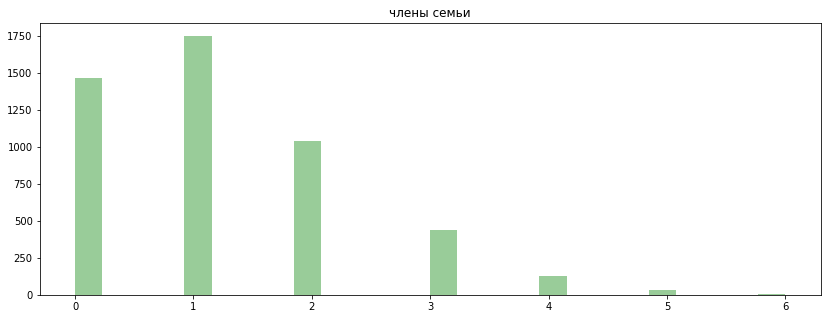

In [19]:
draw_histogram(df, 'family_members', 'члены семьи', )

Данные о членах семьи скорее являются данным о количестве детей. В таком случае данные выглядятю одекватно. У большинства клиентов от 0 до 2х детей

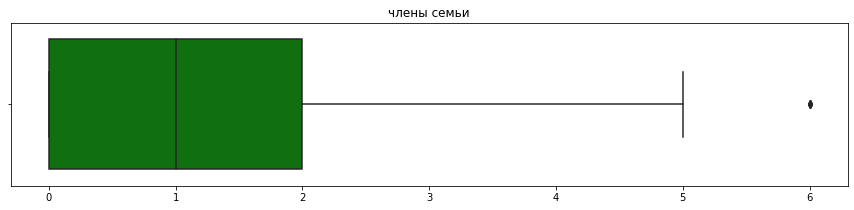

In [20]:
draw_boxplot(df, 'family_members', 'члены семьи')

Удалять выборос не будем. Нам понадобятся все данные.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


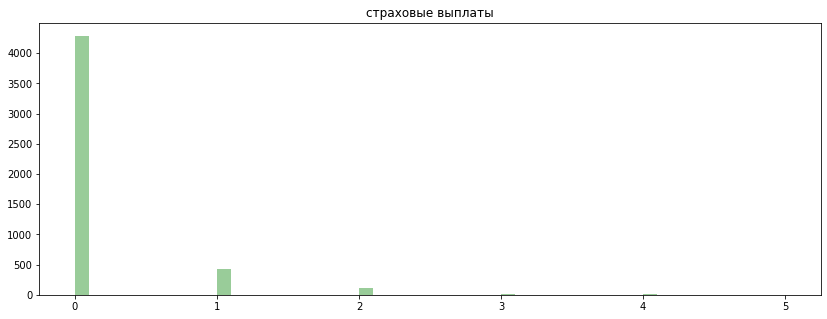

In [21]:
draw_histogram(df, 'insurance_payments', 'страховые выплаты')

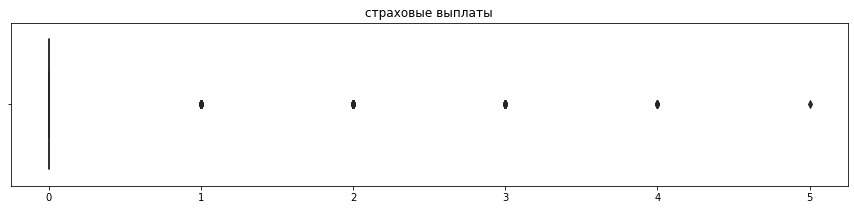

In [22]:
draw_boxplot(df, 'insurance_payments', 'страховые выплаты')

Здесь данные тоже выглядят вполне адекватными

**Вывод**

- Аномальных данных не обнаружено
- Пропусков в данных не обнаружено
- Удалены дубликаты
- Переименованы колонки
- Изменены типы данных

Данными подготовлены, перейдём к следующему этапу


## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:


$$
w = (X^T X)^{-1} X^T y
$$

**Создим и обучим модель линейной регрессии.**

При задаче обучения нахождения минимального MSE $$w = \arg\min_w MSE(Xw, y)$$ минимальное значение MSE получится когда веса равны величине $$w = (X^T X)^{-1} X^T y$$

**Вопрос**
 Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
 
 Вопрос в том изментися ли качество модели линейной регрессии если уножить матрицу $X$ на обратимую матрицу $P$, то при вычислении весов линейной регрессии $w$ предсказания $a = Xw$ не изменятся

**Ответ:** Качество линейной регрессии не измениться

**Обоснование:** 

Заменим $w = (X^T X)^{-1} X^T y$ на формулу с умноженной матрицей $X$ на обратимую матрицу $P$, получится формула 
$$
w_n = ((XP)^T XP)^{-1} (XP)^T y
$$

+  У нас есть ряд свойств:
    $$
(AB)^T=B^T A^T \tag 1
$$
$$
(AB)^{-1} = B^{-1} A^{-1} \tag 2
$$
$$
A A^{-1} = A^{-1} A = E \tag 3
$$
$$
AE = EA = A \tag 4
$$
$$
A(BC) = (AB)C \tag 5
$$

$(X^T)^{-1} = (X^{-1})^T$ - обратная матрица бывает только у квадратных матриц, а для матрицы признаков такое условие почти никогда не соблюдается.
$E$ - единичная матрица

+  Для начала раскроем $(XP)^T$ в примере $((XP)^T X P)^{-1}$, и получим $(P^T X^T X P)^{-1} (P^TX^T)y$



  
Воспользуемся свойством 2:
    
+  $(P^T(X^TX)P)^{-1}$, пусть тут $A=P^T$, $B=(X^TX)P)^{-1}$, тогда $(P^T(X^TX)P)^{-1}$

+ полная формула выглядит так:
$$
w_n = ((X^TX)P)^{-1} (P^T)^{-1} P^TX^Ty
$$

+ согласно правилу 3: 

$(P^T)^{-1} P^T = E$ тогда $((X^TX)P)^{-1} (P^T)^{-1} P^TX^Ty = ((X^TX)P)^{-1} EX^Ty$
 

+ согласно свойству 4


$EX^T$ равно $X^T$ тогда  $((X^TX)P)^{-1} EX^Ty = ((X^TX)P)^{-1}X^Ty$

$$
w_n = ((X^TX)P)^{-1}X^Ty
$$

+ воспользуемся свойстом 2 

$$
((X^TX)P)^{-1}X^Ty = P^{-1}(X^TX)X^Ty
$$

по условию $(X^T X)^{-1} X^T y = w$ следовательно

$$
w_n = P^{-1}w
$$

формула предсказаний для с обратимой матрицей $a_n = XPw_n$
$$
a_n = XPw_n
$$
$$
a_n = XPP^{-1}w
$$
$PP^{-1}$ даёт единичную матрицу $E$
Следовательно $a_n$ будет равно:
$$
a_n = Xw
$$
$$
a_n = a
$$

Умножение матрицы признаков на обратимую матрицу не меняет качество линейной регрессии

## Алгоритм преобразования

**Алгоритм**

1. Выделить из данных признаки и целевой признак
2. Отмасштабируем признаки
3. Рассчитаем вектор весов $w$ для изначальной матрицы данных после по формуле $w = (X^T X)^{-1} X^T y$
4. Вычислить вектор предсказаний $a$ по формуле $a = Xw$
5. Создадим обратимую(квадратуную) матрицу
6. Теперь сделаем тоже самое, но для матрицы признаков, которую мы умножим на обратимую матрицу $P$, полученную ранее
7. Посчитаем разницу между предсказаниями

In [23]:
# Выделение из данных признаков и целевого признака
X = df.drop('insurance_payments', axis=1)
y = df['insurance_payments']

In [24]:
# Масштабирование признаков
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [25]:
# Пишем функцию для генерации обратимой матрицы
def get_squad_matrix(low, high, size):
    squad_matrix = np.random.randint(low, high, size=(size, size))
    print(squad_matrix)
    print()
    print("Обратимость матрицы:", np.linalg.det(squad_matrix) != 0)
    return squad_matrix

In [26]:
# рассчитваем вектор весов для для изначаной матрицы
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(w)

[ 0.00473007  0.30692826 -0.00138603 -0.01565625]


In [27]:
# Вычисляем предсказание
a = X.dot(w)

In [28]:
# генерируем обратимую матрицу
P = get_squad_matrix(1, 100, 4)

[[34 11 71 14]
 [64 13 34 97]
 [26  5 50 49]
 [64 74 73 37]]

Обратимость матрицы: True


$$w_n = ((XP)^T XP)^{-1} (XP)^T y$$

$$
w = (X^T X)^{-1} X^T y
$$

In [29]:
# найдём веса для признаков умноженных на обратимую матрицу
X_n = X.dot(P)

w_n = np.linalg.inv(X_n.T.dot(X_n)).dot(X_n.T).dot(y)
print(w_n)

[ 0.00866212 -0.00403065 -0.0032877  -0.00085842]


In [30]:
# вычислем предсказание с обратимой матрицей
a_n = X_n.dot(P).dot(w_n)
#a_n = np.linalg.inv(P).dot(w)


In [31]:
# Вычислим разницу между предсказаниями
a_dif = a - a_n
print(a_dif.sum())

1.6143530956469476e-11


**Обоснование**

Разинца между предсказкнием c признками без унможения на обратимую матрицу и признаками умноженными на обратимую матрицу - минимальна

## Проверка алгоритма

In [32]:
def check_alg (X, y):
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)
    print("метрика R2:", r2_score(y, predictions))
    print("метрика MSE:", mean_squared_error(y, predictions))
    


Посчитаем метрики для признаков без обратимой матрицы

In [33]:
check_alg(X, y)

метрика R2: 0.4302010046633359
метрика MSE: 0.1252726382276536


Посчитаем метрики для признаков с обратимой матрицей

In [34]:
check_alg(X_n, y)

метрика R2: 0.4302010046633358
метрика MSE: 0.12527263822765364


Метрики качества почти не отличаются

## Итоговый вывод

* Проверили и подготовили данные
* Доказали что умножение признаков на обратимую матрицу не меняем качество линейной регрессии
* Создали и проверили алгоритм преобразования
* В итоге найден способ защитить данные страховой компании "Хоть потоп"